# Histograma e suas estatísticas

O histograma de uma imagem em tons de cinza é uma medida estatística que indica o número de ocorrências de um determinado
nível de cinza na imagem. Na toolbox ia636 existe a função `ia636:iahistogram` que calcula o histograma a partir de uma
imagem em níveis de cinza. Ela utiliza a função "bincount" do NumPy. Não é fácil desenvolver uma função em Python/NumPy 
que seja eficiente para calcular o histograma. Uma implementação simples de entender que porém não é eficiente é a "iahistogram_eq" que está em `ia636:iahistogram`. 
É necessário fazer um laço explícito em todos os níveis de cinza e para contar quantas pixels possuem aquele nível de cinza. 
No final da página do `ia636:iahistogram` tem uma comparação de tempos das duas funções.

Veja a seguir o código Python/NumPy para se calcular e mostrar o histograma no Adessowiki. O histograma é
um vetor unidimensional e é normalmente visualizado no Adessowiki utilizando a função "iaplot" que a prepara para ser mostrada via "adshow".
As figuras abaixo mostram a imagem 'cameraman', juntamente com seu histograma.

### Lê e mostra a imagem

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

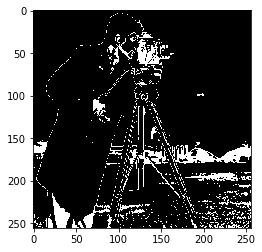

In [21]:
f = mpimg.imread('../data/cameraman.tif')  
plt.imshow((f>40) & (f<150),cmap='gray')

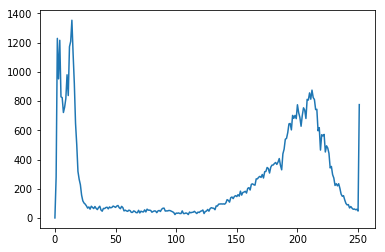

In [12]:
h = np.bincount(f.ravel())
plt.plot(h)

In [11]:
print(f.min(),f.max())
print(len(h))
print(h)
print(h.max())
print(np.where(h==h.max()))
#adshow(ia.iaplot(h, ylabel='n. de pixels', xlabel='niveis de cinza'), 'histograma de f')

0 251
252
[   1  280 1229  952 1216  829  824  722  758  817  980  838 1172 1208 1353
 1123  921  648  502  319  265  228  157  118  103   95   83   68   76   61
   81   73   65   79   66   58   72   81   55   47   66   65   72   74   63
   76   70   73   82   78   73   82   86   71   64   80   72   49   54   49
   46   54   51   39   39   49   45   37   37   53   35   47   43   42   56
   42   61   54   54   52   40   45   49   48   37   49   52   45   60   67
   68   48   49   49   52   51   47   43   38   24   34   33   35   31   31
   49   31   31   35   32   24   41   36   39   40   46   38   31   41   38
   46   49   55   31   45   48   59   47   65   71   68   67   57   83   82
   95   96   97   96   97   95  104  126  121  109  139  144  133  148  153
  147  160  150  184  157  175  178  183  171  203  208  192  231  234  228
  225  268  268  279  285  278  298  274  317  319  346  339  308  348  362
  363  373  380  367  383  407  360  330  439  471  539  545  584  644  647
  

Analisando-se o histograma da imagem cameraman, observa-se que existe uma grande quantidade de pixels com valores
escuros. Eles correspondem ao paletó do cameraman.

Ao se calcular o histograma de uma imagem, perde-se a informação da
disposição espacial dos seus pixels. Veja por exemplo, se ordenarmos os pixels da imagem cameraman, o seu histograma
continuará o mesmo:
—

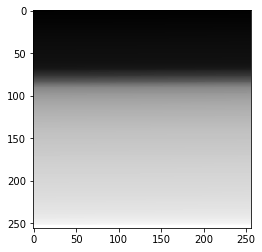

In [23]:
g = np.sort(f.ravel()).reshape(f.shape)
plt.imshow(g,cmap='gray')
#hg = ia.iahistogram(g)
#adshow(ia.iaplot(hg, ylabel='n. de pixels', xlabel='niveis de cinza'), 'histogram de f com pixels ordenados')

Observe que visualizar a imagem de pixels ordenados é também uma boa forma de perceber a distribuição dos níveis de cinza
de uma imagem. Neste caso, observe como existe uma transição razoavelmente abrupta entre a parte mais escura e mais clara.
Isto corresponde ao vale no histograma, quanto mais largo for um vale, mais abrupta será a variação entre os níveis de
cinza do vale.

Nota-se acima que um mesmo histograma existe para duas imagens. Apesar disto, o histograma é uma das medidas que pode
caracterizar uma imagem. Muito métodos bens sucedidos de classificação de categorias de imagens são baseados nas informações
de seu histograma.

Três outras curvas geradas a partir do histograma são importantes: o histograma acumulado, o histograma normalizado e o histograma
acumulado normalizado. A normalização ocorre quando divide-se o histograma pelo número de pixels da imagem, fazendo com que
a soma dos valores do histograma seja 1.0. O histograma acumulado é dado pela integral do histograma. Veja o
cálculo destas três curvas:

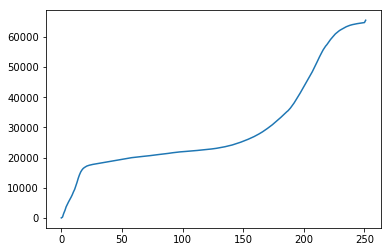

In [24]:
hc  = np.cumsum(h)
plt.plot(hc)

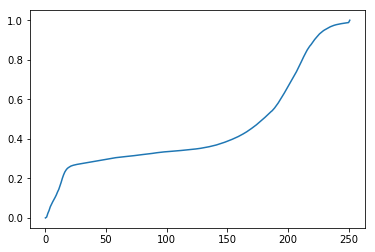

In [27]:
hcn = hc.astype(float)/f.size
plt.plot(hcn)


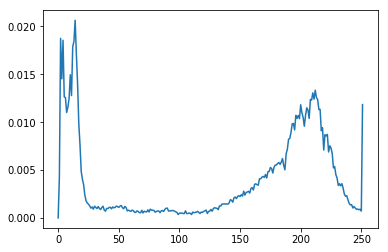

In [25]:
hn  = h.astype(float)/f.size
plt.plot(hn)

A partir do histograma é possível calcular diversas estatísticas da imagem, com a vantagem de não precisar 
varrer novamente a imagem para o seu cálculo. Veja a função `ia636:iah2stats` que faz o cálculo das seguintes
medidas: média, variância, obliquidade, curtose, moda mediana, percentil e entropia.

##Documentação Oficial Numpy

- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html#numpy.histogram histogram`
- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html#numpy.bincount bincount`
   

## Veja também:

- `ia636:iahistogram` Função iahistogram`
- `ia636:iaplot` Plot no Adessowiki

## Páginas Interessantes

- `http://en.wikipedia.org/wiki/Histogram Histogram - Wikipedia`